In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [4]:
churn_data=pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

<AxesSubplot:title={'center':'Количество ушедших и лояльных клиентов'}, xlabel='Exited', ylabel='count'>

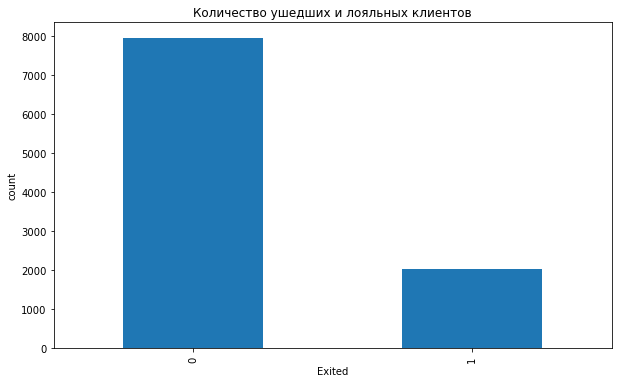

In [70]:
df=churn_data.groupby(by='Exited')['Exited'].count()
df.plot(
    kind='bar',
    figsize=(10, 6),
    title='Количество ушедших и лояльных клиентов',
    ylabel='count'
)

In [75]:
print(f'Cоотношение ушедших и лояльных клиентов {round(df[1]/df[0], 2)}')

Cоотношение ушедших и лояльных клиентов 0.26


Из графика видно, что количество ушедших клиентов составляет примерно четверть от лояльных 

In [71]:
df

Exited
0    7963
1    2037
Name: Exited, dtype: int64

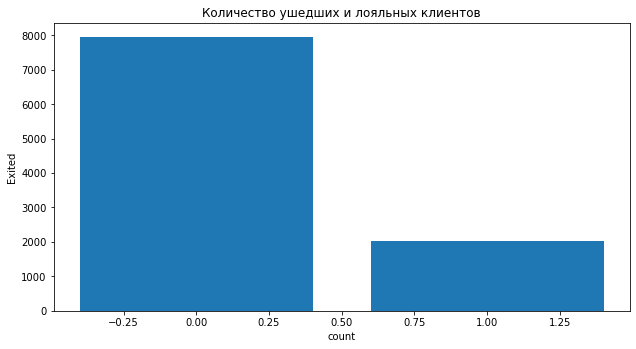

In [68]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_axes([0,0,1,1])
dt=churn_data.groupby(by='Exited')['Exited'].count()
ax.bar(
    x=dt.index,
    height=dt
)

ax.set_ylabel('Exited')
ax.set_xlabel('count')
ax.set_title('Количество ушедших и лояльных клиентов');


Text(0, 0.5, 'count')

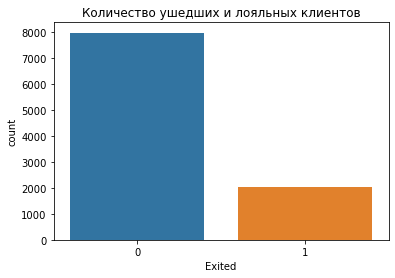

In [43]:
df=churn_data.groupby(by='Exited', as_index=False)['CustomerId'].count()
barplot=sns.barplot(
    data=df,
    x='Exited',
    y='CustomerId'
    )
barplot.set_title('Количество ушедших и лояльных клиентов')
barplot.set_ylabel('count')

In [44]:
df

,Exited,CustomerId
0,0,7963
1,1,2037


In [53]:
df=churn_data.groupby(by='Exited', as_index=False)['CustomerId'].count()
fig=px.bar(
    data_frame=df,
    x='Exited',
    y='CustomerId',
    color='Exited',
    text='CustomerId',
    height=500,
    width=1000,
    orientation='v',
    title='Количество ушедших и лояльных клиентов'
)

fig.show()

In [32]:
df

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
df=churn_data.pivot_table(
    values='Exited',
    columns='Exited',
    index='Exited',
    aggfunc='count'
)

ValueError: Grouper for 'Exited' not 1-dimensional

In [18]:
df=churn_data.groupby(by='Exited')['Exited'].count().unstack()
df

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.numeric.Int64Index'> was passed